### <span style="color: turquoise;">Importing Necessary Tools and Data</span>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap  # Import LinearSegmentedColormap


# Load the CSV file
file_path = "/Users/bernhardwagner/Documents/Final Project/data/AZWatch_subscribers.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

# Display information about the data
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Custom color palette
custom_palette = ['#727064', '#bebaa7', '#131311']
sns.set_palette(custom_palette)
cmap = LinearSegmentedColormap.from_list("custom", custom_palette)  # Create a custom colormap

   subscriber_id    age_group  engagement_time  engagement_frequency  \
0          14451        18-34             5.55                     7   
1          18386     under 18             5.12                    12   
2          12305  35 and over             4.25                     4   
3          17546        18-34             8.54                    15   
4          15399        18-34            12.12                    20   

  subscription_status  
0          subscribed  
1          subscribed  
2             churned  
3          subscribed  
4          subscribed  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscri

### <span style="color: turquoise;"> Getting an Overview by means of EDA </span>

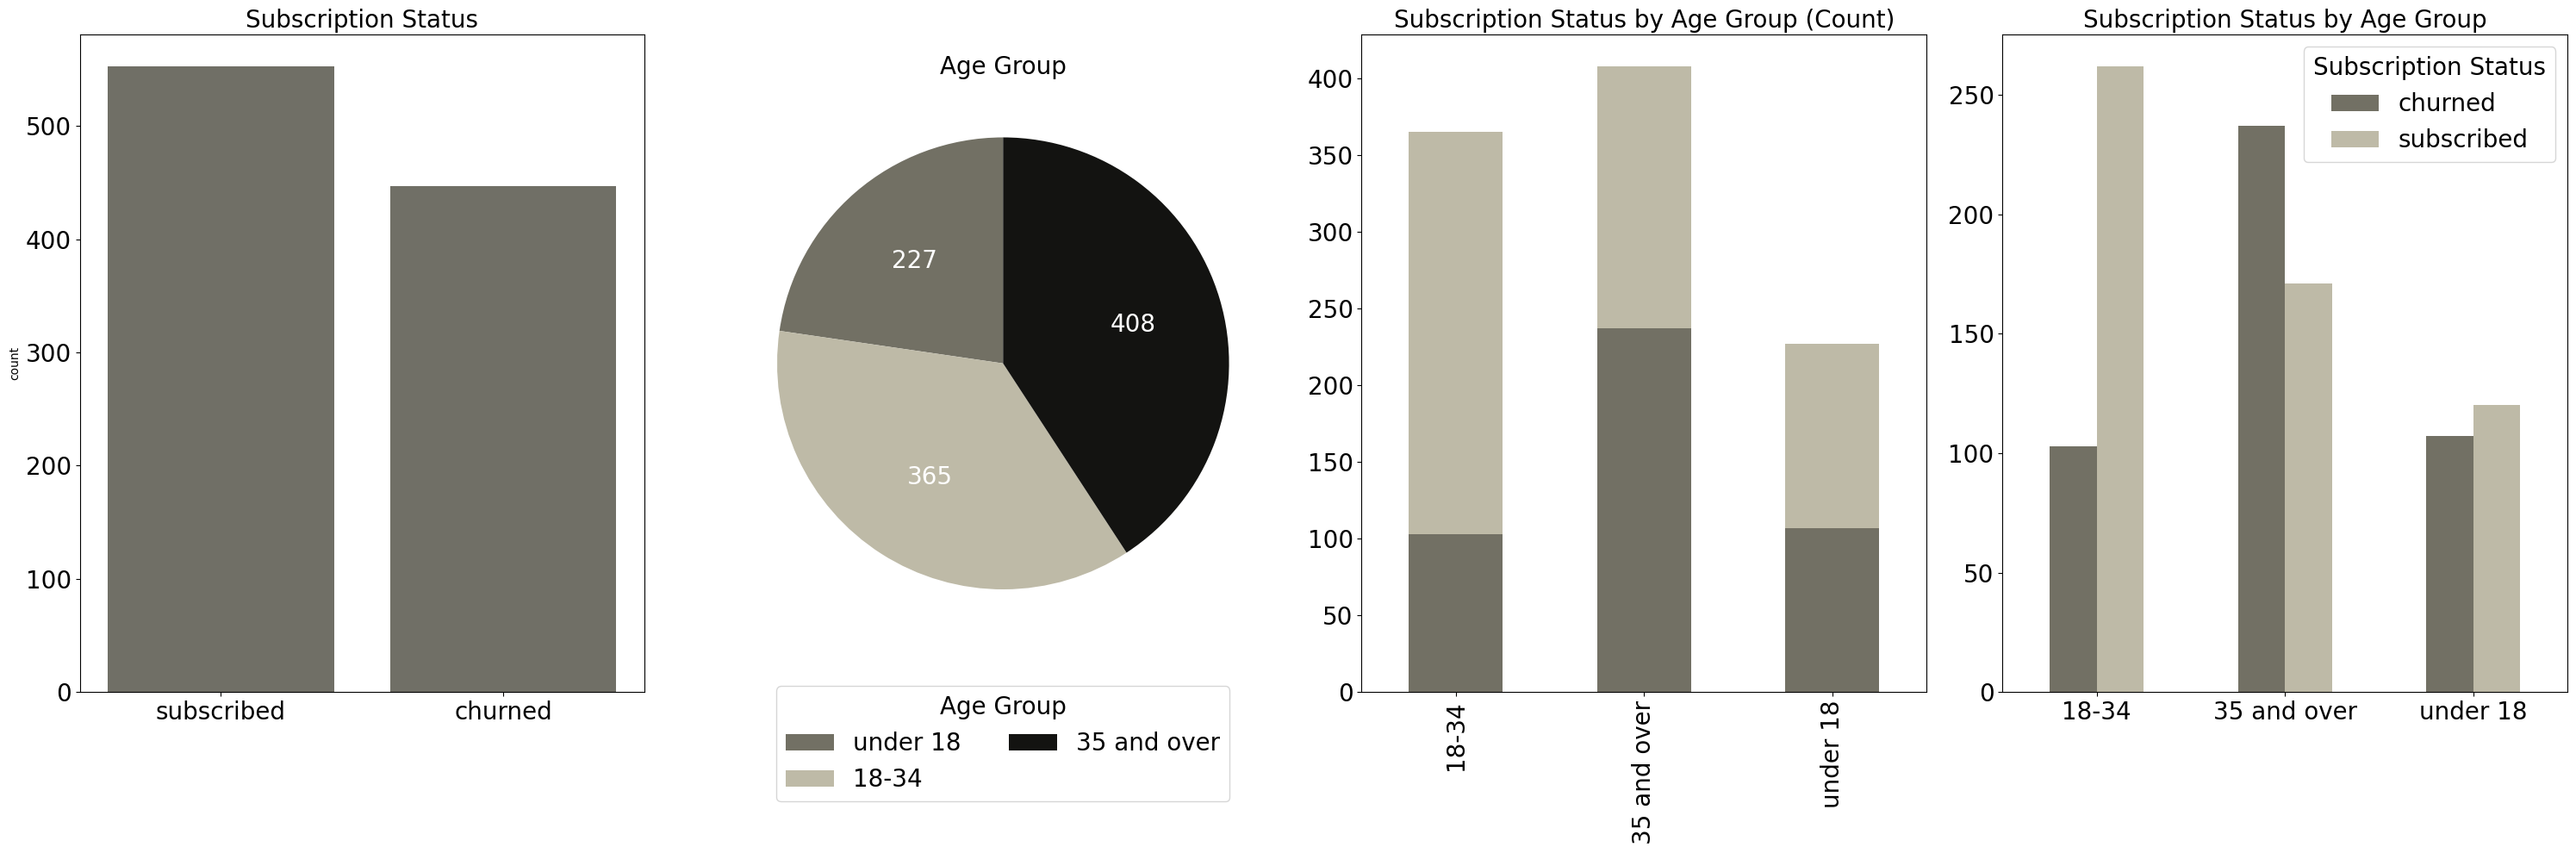

In [21]:
# Looking at Target Variable and its features
 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and 'stacked_df' is defined as in the original code

# Create a 1x4 grid for the first four plots
fig, axs = plt.subplots(1, 4, figsize=(30, 10))  # Adjust figure size as needed

# Common font size settings (customize as desired)
font_size = 20
title_font_size = 20

# Plot on the first column
ax1 = axs[0]
sns.countplot(data=data, x='subscription_status', ax=ax1)
ax1.set_title('Subscription Status', fontsize=title_font_size)
ax1.tick_params(labelsize=font_size)
ax1.set_xlabel('')

# Plot on the second column
#ax2 = axs[1]
#sns.countplot(data=data, x='age_group', ax=ax2)
#ax2.set_title('Age Group', fontsize=title_font_size)
#ax2.tick_params(labelsize=font_size)
#ax2.set_xlabel('')
ax2 = axs[1]
age_group_counts = data['age_group'].value_counts().sort_values(ascending=True)
wedges, texts, autotexts = ax2.pie(age_group_counts, labels=None, autopct=lambda p: f'{int(p * sum(age_group_counts) / 100)}', startangle=90)
ax2.set_title('Age Group', fontsize=title_font_size)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(font_size)

# Add a legend below the pie chart
ax2.legend(wedges, age_group_counts.index, title="Age Group", loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=font_size, title_fontsize=title_font_size)



# Stacked bar chart on the third column
ax3 = axs[2]
stacked_df = data.groupby(['age_group', "subscription_status"]).count().reset_index()
stacked_df = stacked_df.pivot(index="age_group", columns="subscription_status", values="subscriber_id")
stacked_df.plot(kind="bar", stacked=True, ax=ax3, fontsize=font_size)
ax3.set_title('Subscription Status by Age Group (Count)', fontsize=title_font_size)
ax3.tick_params(labelsize=font_size)
ax3.set_xlabel('')
ax3.get_legend().remove()  # Remove the legend for clarity

# Stacked bar chart (not stacked) on the fourth column
ax4 = axs[3]
stacked_df.plot(kind="bar", stacked=False, ax=ax4, fontsize=font_size)
ax4.set_title('Subscription Status by Age Group', fontsize=title_font_size)
ax4.tick_params(labelsize=font_size, rotation=0)
ax4.set_xlabel('')
ax4.legend(title='Subscription Status', loc='upper right', fontsize=font_size, title_fontsize=title_font_size)  # Add legend inside the plot

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


**Subscription Status**
- high level of churned users

**Age Group**
- biggest age group is 35 and over, second biggest age group is 18-34 and the smallest age group is under 18

**Subscription Status by Age Group**
- while the platform seems to perform well for 18-34 year old people, medium for under 18, age 35 and over needs attention

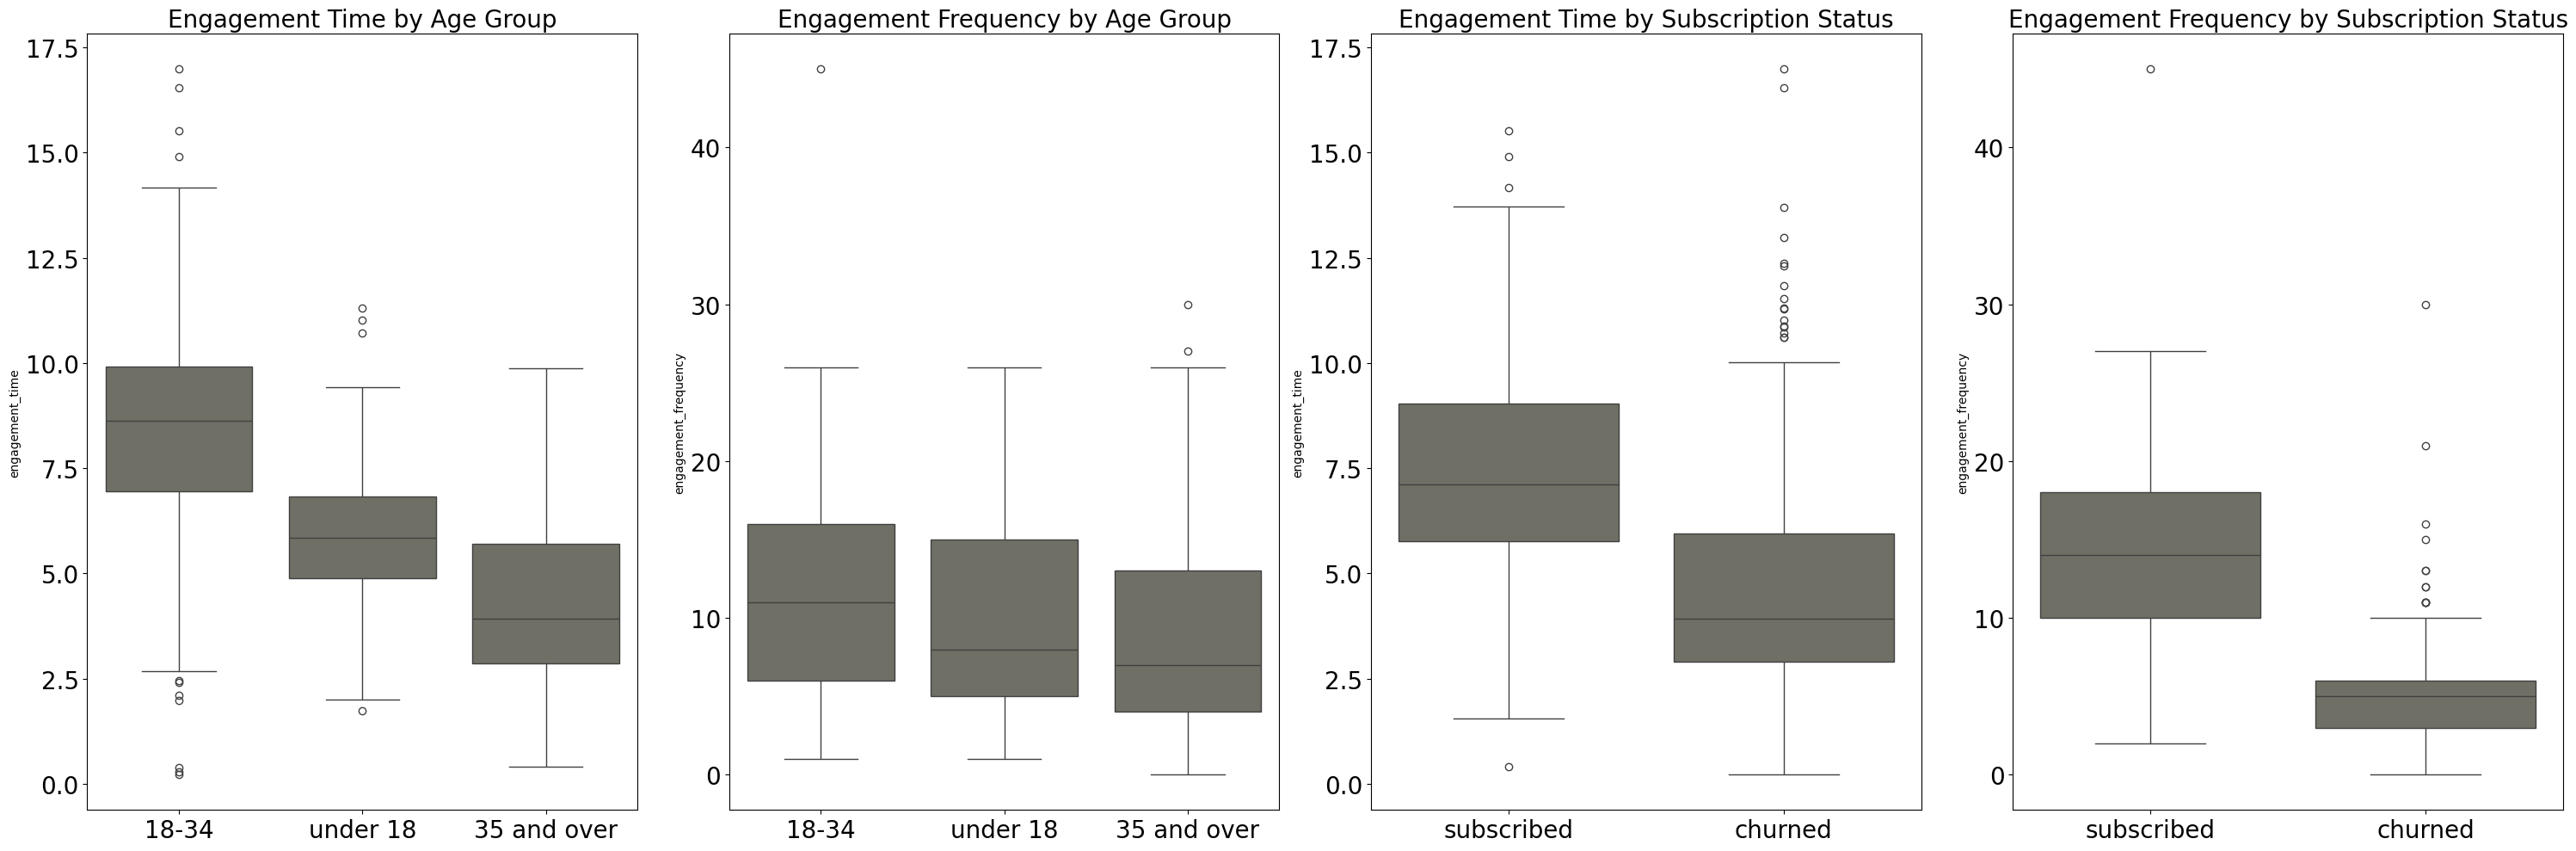

In [22]:
# Looking at Quality of Data
# Create a 1x4 grid for the box plots
fig, axs = plt.subplots(1, 4, figsize=(30, 10))  # Adjust figure size as needed

# Common font size settings (customize as desired)
font_size = 20
title_font_size = 20

# Box plot 1: Engagement Time by Age Group
sns.boxplot(ax=axs[0], data=data, x='age_group', y='engagement_time')
axs[0].set_title('Engagement Time by Age Group', fontsize=title_font_size)
axs[0].tick_params(labelsize=font_size)  # Set font size for x and y ticks
axs[0].set_xlabel('')  # Remove x-axis label

# Box plot 2: Engagement Frequency by Age Group
sns.boxplot(ax=axs[1], data=data, x='age_group', y='engagement_frequency')
axs[1].set_title('Engagement Frequency by Age Group', fontsize=title_font_size)
axs[1].tick_params(labelsize=font_size)
axs[1].set_xlabel('')  # Remove x-axis label

# Box plot 3: Engagement Time by Subscription Status
sns.boxplot(ax=axs[2], data=data, x='subscription_status', y='engagement_time')
axs[2].set_title('Engagement Time by Subscription Status', fontsize=title_font_size)
axs[2].tick_params(labelsize=font_size)
axs[2].set_xlabel('')  # Remove x-axis label

# Box plot 4: Engagement Frequency by Subscription Status
sns.boxplot(ax=axs[3], data=data, x='subscription_status', y='engagement_frequency')
axs[3].set_title('Engagement Frequency by Subscription Status', fontsize=title_font_size)
axs[3].tick_params(labelsize=font_size)
axs[3].set_xlabel('')  # Remove x-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


**Engagement Time by Age Group:**
- Older age groups might have higher median engagement times, indicating they spend more time on the platform.
- Younger age groups may show more variability in engagement time, suggesting a diverse usage pattern.

**Engagement Frequency by Age Group:**

- Certain age groups might engage more frequently but for shorter durations.
- Outliers in younger age groups may suggest very active or very inactive individuals compared to their peers.

**Engagement Time by Subscription Status:**

- Subscribers might have higher median engagement times, indicating they find more value or content to engage with.
- Non-subscribers with high engagement times could be potential targets for conversion to subscribers.

**Engagement Frequency by Subscription Status:**
- Subscribers might engage more frequently, suggesting they are more actively involved with the platform.
- Identifying outliers could help in understanding unusual behavior and tailoring 

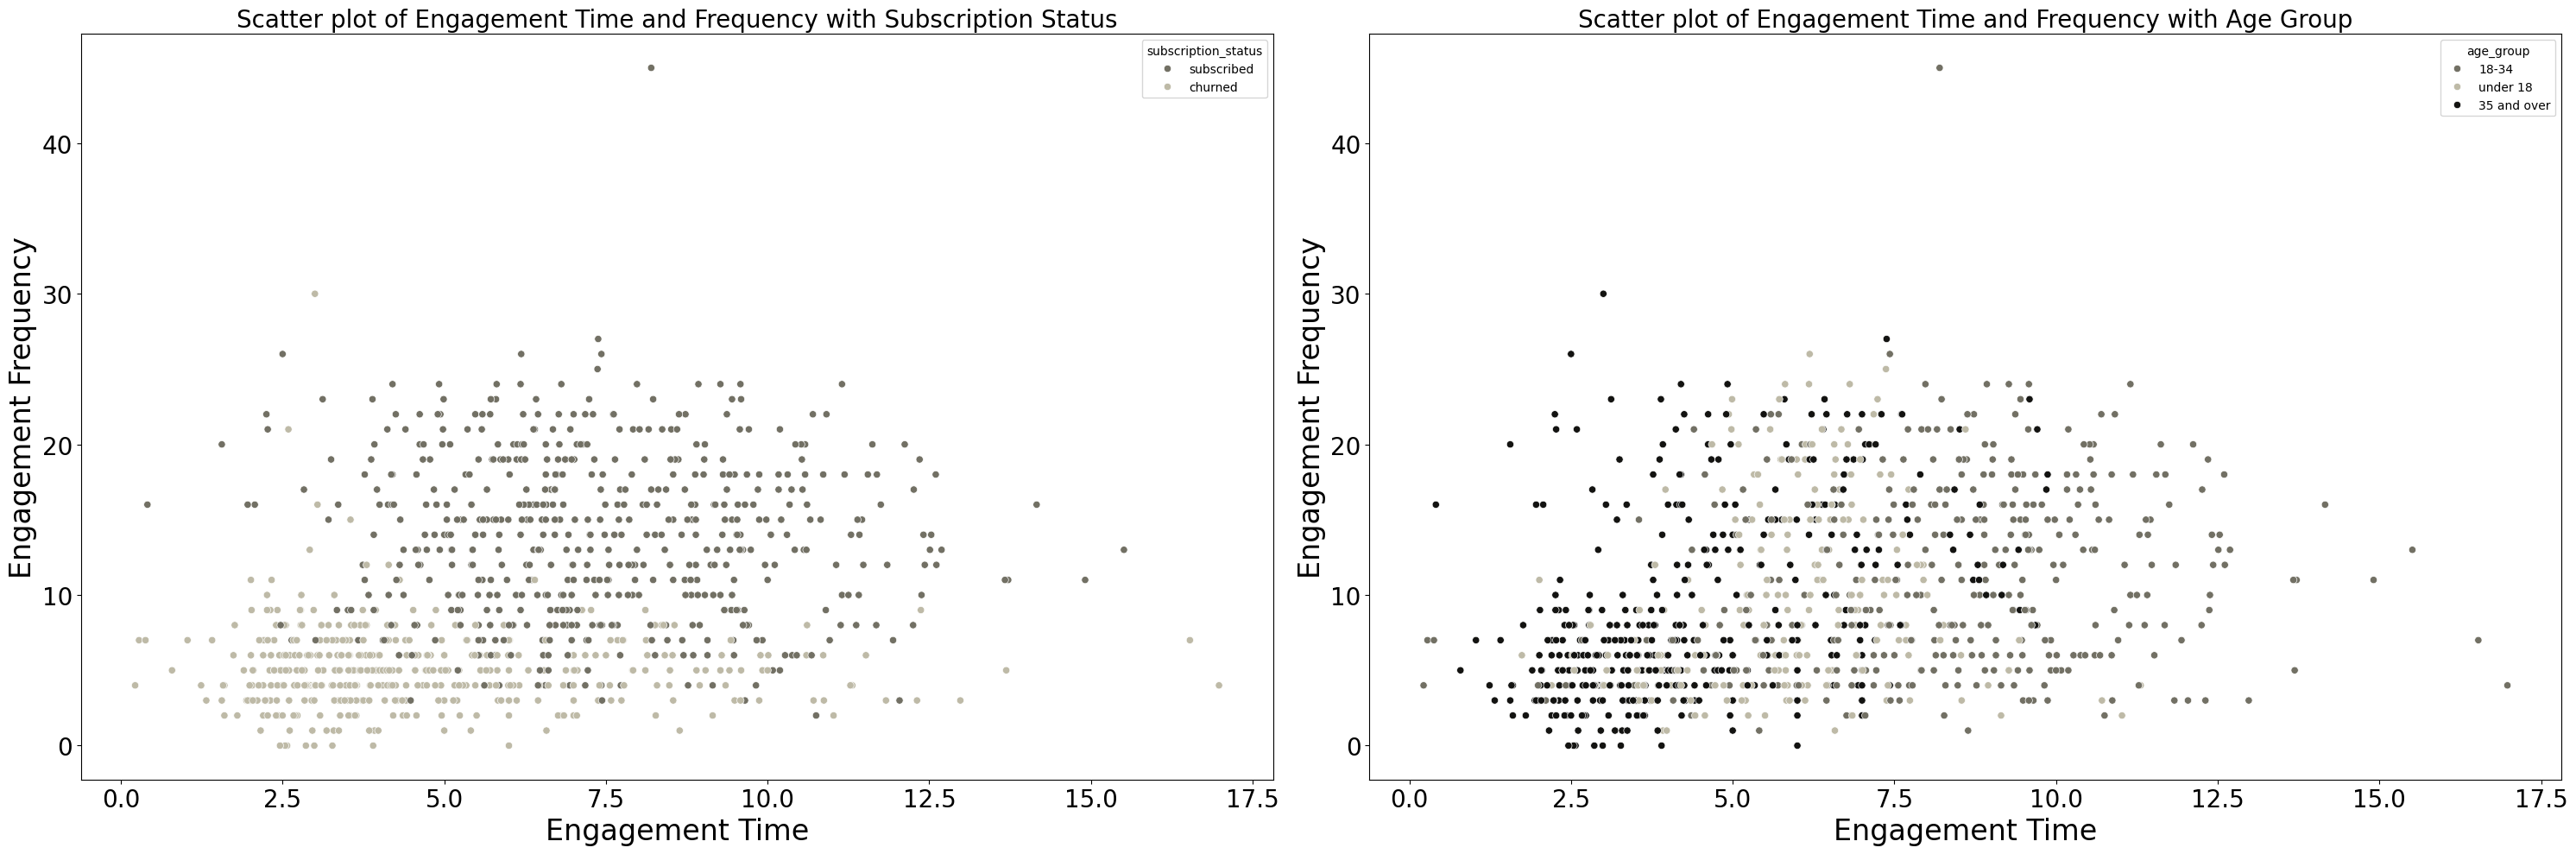

In [23]:
# Looking at Feature Details
# Create a 1x2 grid for the scatter plots
fig, axs = plt.subplots(1, 2, figsize=(30, 10))  # Adjust figure size as needed

# Common font size settings (customize as desired)
font_size = 20
title_font_size = 20
label_font_size = 24  # Font size for axis labels

# Scatter plot 1: Engagement Time vs Engagement Frequency with Subscription Status
sns.scatterplot(ax=axs[0], data=data, x="engagement_time", y="engagement_frequency", hue='subscription_status')
axs[0].set_title('Scatter plot of Engagement Time and Frequency with Subscription Status', fontsize=title_font_size)
axs[0].tick_params(labelsize=font_size)
axs[0].set_xlabel('Engagement Time', fontsize=label_font_size)  # Set x-axis label and its size
axs[0].set_ylabel('Engagement Frequency', fontsize=label_font_size)  # Set y-axis label and its size

# Scatter plot 2: Engagement Time vs Engagement Frequency with Age Group
sns.scatterplot(ax=axs[1], data=data, x="engagement_time", y="engagement_frequency", hue='age_group')
axs[1].set_title('Scatter plot of Engagement Time and Frequency with Age Group', fontsize=title_font_size)
axs[1].tick_params(labelsize=font_size)
axs[1].set_xlabel('Engagement Time', fontsize=label_font_size)  # Set x-axis label and its size
axs[1].set_ylabel('Engagement Frequency', fontsize=label_font_size)  # Set y-axis label and its size

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


**Subscription Status:** 
- If subscribers are generally found at higher engagement times and frequencies, it suggests they find more value in the platform, possibly due to more relevant content or features.

**Age Group**
- Non-subscribers with high engagement times might be potential targets for subscription offers or trials.

#### <span style="color: turquoise;">Findings from EDA</span>

* engagement_time should be cleaned
* Churing is most in the age category of 35 and above
* 18-34 age group has the lowest churn rate
* There is significant difference in the engagement time and frequency of the both categories
* Subscribed customers has a higher engagement frequency and time compared to churn customers
* Engagement time is higher for customers in the age group of 18-34 and 35+ age group has the lowest engagement_time

##### Reacting on EDA: Handling Outliers

Text(0.5, 1.0, 'Engagement Time')

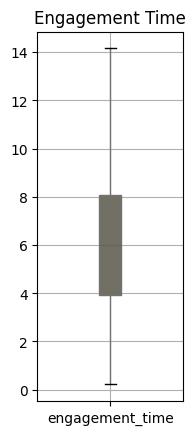

In [24]:
# Getting Rid of Outliers
# Calculate quartiles
Q1 = data['engagement_time'].quantile(0.25)
Q3 = data['engagement_time'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['engagement_time'] < lower_bound) | (data['engagement_time'] > upper_bound)]
data.drop(outliers.index, inplace=True)

# Boxplot for engagement time after removing outliers
plt.subplot(1, 3, 1)
box = data.boxplot(column='engagement_time', patch_artist=True, return_type='dict')  # Enable patch artist for color customization
for patch in box['boxes']:
    patch.set_facecolor(custom_palette[0])  # Apply the first color from the palette
plt.title('Engagement Time')

* Building Correlation Matrix with Extra Analysis of Categorical with Continous Values
https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406

### <span style="color: turquoise;"> Putting it Together: Finding the Correlations</span>

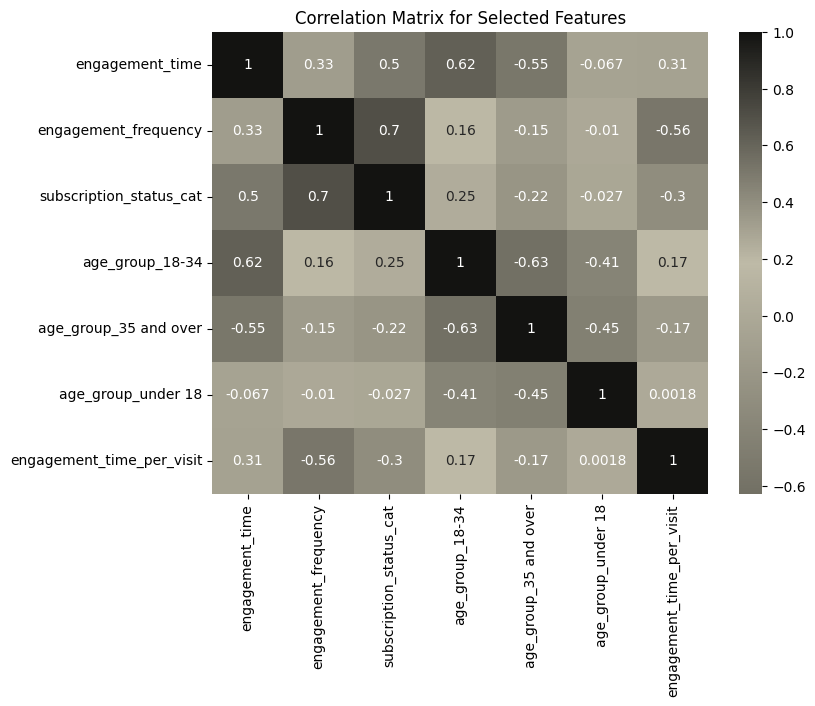

In [25]:
# Looking at Correlation Matrix
import scipy.stats as stats
import pandas as pd
from sklearn import preprocessing

#commented code are for Label Encoding we have tested with this
le = preprocessing.LabelEncoder()
#data['age_group_cat'] = le.fit_transform(data['age_group'])
data['subscription_status_cat'] = le.fit_transform(data['subscription_status'])
data=pd.get_dummies(data,columns=['age_group'],drop_first=False) #You can use OneHotEncoder from sklearn for the same

# Building Correlation Matrix with Extra Analysis of Categorical with Continous Values

num_df=data.drop(columns="subscriber_id").select_dtypes(exclude=['object'])  # Selecting all features(converted to Numerical)

#Adding new feature for better analysis
num_df["engagement_time_per_visit"]=num_df['engagement_time']/(num_df['engagement_frequency']+1)
plt.figure(figsize=(8, 6))
correlation_matrix=num_df.corr()
sns.heatmap(correlation_matrix, annot=True,cmap=cmap)
plt.title('Correlation Matrix for Selected Features')
plt.show()

In [26]:
#Extra Point-biserial correlation stats.pointbiserialr(df['gender'], df['MonthlyCharges'])
#Helpful to find correlation between categorical variable and continous varaible
target="subscription_status_cat"
for i in num_df.columns:
  print(i,stats.pointbiserialr(data[target],num_df[i]))

#age_group_under 18 has low p_value and a very low correlation it could be excluded but we are not excluding it so as to not loose any potential information

engagement_time SignificanceResult(statistic=np.float64(0.5048515268679941), pvalue=np.float64(1.5724246153528717e-65))
engagement_frequency SignificanceResult(statistic=np.float64(0.7048069747662216), pvalue=np.float64(2.1874371493631652e-150))
subscription_status_cat SignificanceResult(statistic=np.float64(1.0), pvalue=np.float64(0.0))
age_group_18-34 SignificanceResult(statistic=np.float64(0.25328502339187026), pvalue=np.float64(4.809792057786523e-16))
age_group_35 and over SignificanceResult(statistic=np.float64(-0.22467678381709266), pvalue=np.float64(7.300559807510155e-13))
age_group_under 18 SignificanceResult(statistic=np.float64(-0.02686015369373214), pvalue=np.float64(0.397117511021161))
engagement_time_per_visit SignificanceResult(statistic=np.float64(-0.3040598413283414), pvalue=np.float64(9.486365351008653e-23))


#### <span style="color: turquoise;">Insights from the Correlation Matrix</span>

- age_group_under 18 and age_group_35 and over have low p_value and a very low correlation it could be excluded but we are not excluding it so as to not loose any potential information
- to engagement_time_per_visit, the newly engineered feature, applies the same

## <span style="color: turquoise;">Baseline Model: Logistic Regression</span>

Logistic regression is a good model to start with in general because it is simple to implement, computationally efficient, interpretable, and works well for binary classification problems.

this set is represented as follows:
[[111  11]
 [ 20 157]]
Judging on the quality of the prdiction:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       122
           1       0.93      0.89      0.91       177

    accuracy                           0.90       299
   macro avg       0.89      0.90      0.89       299
weighted avg       0.90      0.90      0.90       299



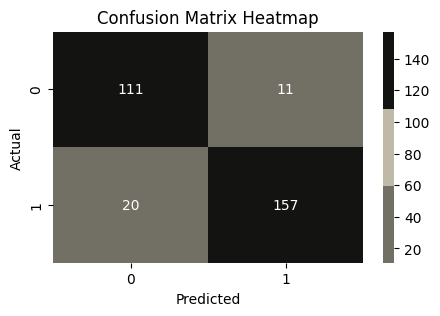

CV-Score on training data :  0.8995580678314491
CV-Score on test data :  0.9131073446327683


In [27]:
# Starting with Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


# Split the data into features and target
X = num_df.drop("subscription_status_cat", axis=1)
y = num_df['subscription_status_cat']

scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# Further split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Train a simple Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("this set is represented as follows:")
print(conf_matrix)
print("Judging on the quality of the prdiction:")
print(class_report)

# Plotting the heatmap for confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(custom_palette))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

from sklearn.model_selection import cross_val_score
val_score=cross_val_score(model,X_train, y_train, cv=5)
print("CV-Score on training data : ",val_score.mean())
val_score=cross_val_score(model,X_test, y_test, cv=5)
print("CV-Score on test data : ",val_score.mean())


#### <span style="color: turquoise;">Results of Baseline Model</span>

* Both classes (0 and 1) have good
precision, recall, and F1-scores, indicating a well-balanced performance.
* The model is slightly better at predicting class 1 (subscribed) with higher precision but slightly lower recall compared to class 0 (churned).

**<span style="color: turquoise;">The model performs well with an overall accuracy of 90%. </span>**

## <span style="color: turquoise;">Comparison of Models for Classification</span>
1) Import Necessary Tools and Libraries
2) Training and Evaluating the  Models
3) Choice of Advanced Model

### <span style="color: turquoise;">Importing Necessary Tools and Libraries</span>

In [28]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

### <span style="color: turquoise;">Training and Evaluating the  Models</span>


In [29]:
# Printing the Different Models' Values
# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVC)": SVC(),
    "KNN":KNeighborsClassifier()
}


# Train and evaluate each model
results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  train_cv_score=cross_val_score(model,X_train, y_train, cv=5)
  test_cv_score=cross_val_score(model,X_test, y_test, cv=5)

  results[name] = {
      "Confusion Matrix": conf_matrix,
      "Classification Report": class_report,
      "Train CV Score": train_cv_score.mean(),
      "Test CV Score": test_cv_score.mean()
  }
  print(f"Model: {name}")
  print(f"Confusion Matrix:\n{conf_matrix}")
  print(f"Classification Report:\n{class_report}")
  print(f"Train CV Score: {train_cv_score.mean()}")
  print(f"Test CV Score: {test_cv_score.mean()}")
  print("\n" + "-"*50 + "\n")


Model: Logistic Regression
Confusion Matrix:
[[111  11]
 [ 20 157]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       122
           1       0.93      0.89      0.91       177

    accuracy                           0.90       299
   macro avg       0.89      0.90      0.89       299
weighted avg       0.90      0.90      0.90       299

Train CV Score: 0.8995580678314491
Test CV Score: 0.9131073446327683

--------------------------------------------------

Model: Decision Tree
Confusion Matrix:
[[105  17]
 [ 15 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       122
           1       0.91      0.92      0.91       177

    accuracy                           0.89       299
   macro avg       0.89      0.89      0.89       299
weighted avg       0.89      0.89      0.89       299

Train CV Score: 0.8665262076053443
Test CV Score

/Users/bernhardwagner/Documents/Final Project/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:04:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bernhardwagner/Documents/Final Project/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:04:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bernhardwagner/Documents/Final Project/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:04:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bernhardwagner/Documents/Final Project/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:04:41] WARNING: /Users/runner/work/xgboost/xgboost

Model: XGBoost
Confusion Matrix:
[[108  14]
 [ 16 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       122
           1       0.92      0.91      0.91       177

    accuracy                           0.90       299
   macro avg       0.90      0.90      0.90       299
weighted avg       0.90      0.90      0.90       299

Train CV Score: 0.8909660842754367
Test CV Score: 0.8863276836158193

--------------------------------------------------

Model: Gaussian Naive Bayes
Confusion Matrix:
[[114   8]
 [ 24 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       122
           1       0.95      0.86      0.91       177

    accuracy                           0.89       299
   macro avg       0.89      0.90      0.89       299
weighted avg       0.90      0.89      0.89       299

Train CV Score: 0.8794655704008221
Test CV Score: 0.8

### <span style="color: turquoise;">Choice of Advanced Model</span>
- the initial try with logistic regression performed quite acceptable considering 90% accuracy at 0.88 & 0.91 f1-score, predicting 91,6% of the test data correctly
- SVM had slightly better values, so had KNN 

* **<span style="color: turquoise;"> considering computation cost and time KNN was chosen as model to continue with by means of optimization</span>**

## <span style="color: turquoise;">Boosting the Performance</span>
As KNN is faster we will use all the tunable parameters and start by searching on a board search space and then narrow down the search space near to the best parameter values

#### Strategy for Hyper Parameter Tuning
- Step1:  Gridsearch Cross Validation for narrowing down best KNN-Parameters
- Step2:  Gridsearch Cross Validation for finding best KNN-Parameters
- Step3:  Building the Final Model
- Step4:  Prooving Quality of the final Model

##### <span style="color: turquoise;">Step1:  Gridsearch Cross Validation for narrowing down best KNN-Parameters</span>
A broad search range helps identify the best hyperparameter ranges and gain a comprehensive understanding of the data and the model.

In [30]:
# Improving the Model with Hyperparameter Tuning
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
import warnings  # For handling potential warnings

# Define a comprehensive search space for KNN hyperparameters
param_grid = {
    'n_neighbors': range(1, 100,3),  # Explore a wider range a
    'weights': ['uniform', 'distance'],  # Consider both weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],  # Include 'auto' for broader exploration
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Explore various distance metrics    'chebyshev' excluded because of of risk pf  overfitting
    'leaf_size': range(5, 41, 5),  # Broader range for leaf_size exploration (5 to 40)
    'p': [1, 2],  # Explore both Minkowski distance power parameters
}

# Create a KNN model instance
knn_model = KNeighborsClassifier()

# Accuracy score metric
acc_score = make_scorer(accuracy_score)

# Start time measurement
start_time = time.time()


# Perform GridSearchCV with n_jobs=-1 for parallelization and verbose=2 for progress details
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=acc_score, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# End time measurement
end_time = time.time()
total_time_minutes = (end_time - start_time) / 60

# Print the best parameters, cross-validation score, and execution time
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best KNN Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"Total Execution Time of Grid Search CV: {total_time_minutes:.2f} minutes")

tuned_knn_model = grid_search.best_estimator_

# Evaluate the tuned KNN model on the test set
y_pred = tuned_knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
train_cv_score = cross_val_score(tuned_knn_model, X_train, y_train, cv=5)
test_cv_score = cross_val_score(tuned_knn_model, X_test, y_test, cv=5)  # Use best_estimator_



Fitting 5 folds for each of 9504 candidates, totalling 47520 fits
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=

/Users/bernhardwagner/Documents/Final Project/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [31]:
# Printing the Results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"Train CV Score: {train_cv_score.mean()}")
print(f"Test CV Score: {test_cv_score.mean()}")

Confusion Matrix:
[[116   6]
 [ 16 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       122
           1       0.96      0.91      0.94       177

    accuracy                           0.93       299
   macro avg       0.92      0.93      0.92       299
weighted avg       0.93      0.93      0.93       299

Train CV Score: 0.9024254881808839
Test CV Score: 0.9063276836158192


#### <span style="color: turquoise;">Result of Step1</span>

* the best KNN Hyperparametersseem to be: 
    * 'algorithm': 'auto'
    * 'leaf_size': 5 
    * 'metric': 'minkowski' 
    * 'n_neighbors': 13     
    * 'p': 2    
    * 'weights': 'uniform'


##### <span style="color: turquoise;">Step2:  Gridsearch Cross Validation for finding best KNN-Parameters</span>
A refined search range focuses on the most promising parameters and further optimizes the model while reducing computational effort.

In [32]:
# Optimizing the Model with GridSearchCV
param_grid = {
    'n_neighbors': range(11, 15, 2),  # Explore around n_neighbors=13 (best previously)
    'weights': ['uniform', 'distance'],  # Keep both weighting schemes
    'algorithm': ['auto', 'ball_tree'],  # Focus on 'auto' and 'ball_tree'
    'metric': ['minkowski', 'euclidean'],  # Explore around 'minkowski' (best previously)
    'leaf_size': range(3, 8, 2),  # Explore around leaf_size=5 (best previously)
    'p': [1, 2],  # Keep both Minkowski distance power parameters
}

start_time = time.time()


# Perform GridSearchCV with n_jobs=-1 for parallelization and verbose=2 for progress details
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=acc_score, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# End time measurement
end_time = time.time()
total_time_minutes = (end_time - start_time) / 60

# Print the best parameters, cross-validation score, and execution time
best_params = grid_search.best_params_
best_score = grid_search.best_score_



Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=3, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_s

In [33]:
# Printing the Results
print(f"Best KNN Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"Total Execution Time of Grid Search CV: {total_time_minutes:.2f} minutes")

tuned_knn_model = grid_search.best_estimator_

# Evaluate the tuned KNN model on the test set
y_pred = tuned_knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
train_cv_score = cross_val_score(tuned_knn_model, X_train, y_train, cv=5)
test_cv_score = cross_val_score(tuned_knn_model, X_test, y_test, cv=5)  # Use best_estimator_

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"Train CV Score: {train_cv_score.mean()}")
print(f"Test CV Score: {test_cv_score.mean()}")

Best KNN Hyperparameters: {'algorithm': 'auto', 'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9024
Total Execution Time of Grid Search CV: 0.01 minutes
Confusion Matrix:
[[116   6]
 [ 16 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       122
           1       0.96      0.91      0.94       177

    accuracy                           0.93       299
   macro avg       0.92      0.93      0.92       299
weighted avg       0.93      0.93      0.93       299

Train CV Score: 0.9024254881808839
Test CV Score: 0.9063276836158192


#### <span style="color: turquoise;"> Result of Step 2</span>

Accuracy was not improved any further, so lets continue with different test sizes.

* **<span style="color: turquoise;">Maximum accuracy is reached at 93%.</span>**

##### <span style="color: turquoise;">Step3:  Building the Final Model</span>
Building KNN model with the best set of paramters and testing it on a test size of 20%

Confusion Matrix:
[[ 78   3]
 [  9 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        81
           1       0.97      0.92      0.95       119

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Train CV Score: 0.89, Scores=[0.89 0.91 0.89 0.88 0.89]
Test CV Score: 0.9, Scores=[0.89 0.91 0.89 0.88 0.89]


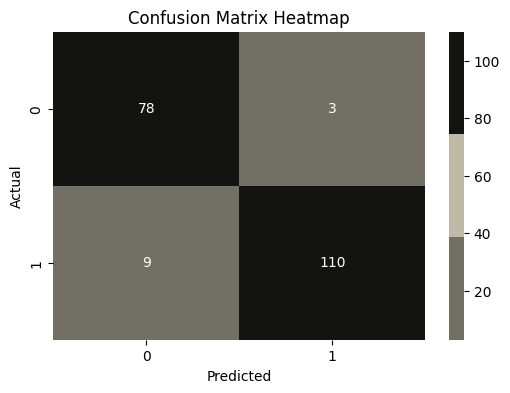

In [52]:
# Building the Final Model and Printing the Results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

final_model=KNeighborsClassifier(algorithm="auto",leaf_size=3,metric="minkowski",n_neighbors=13,p=1,weights="uniform")
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)
y_proba=final_model.predict_proba(X_test)[:,1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
train_cv_score = cross_val_score(final_model, X_train, y_train, cv=5)
test_cv_score = cross_val_score(final_model, X_test, y_test, cv=5)  # Use best_estimator_

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"Train CV Score: {train_cv_score.mean().round(2)}, Scores={train_cv_score.round(2)}")
print(f"Test CV Score: {test_cv_score.mean().round(2)}, Scores={train_cv_score.round(2)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(custom_palette))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()



#### <span style="color: turquoise;">Result of Step 3</span>

**<span style="color: turquoise;">Finally the model reaches 94% accuracy at the given test size predicting maximum of curned and subscribed.</span>**

##### <span style="color: turquoise;">Step4:  Prooving Quality of the final Model</span>

Choosing between ROC and PR curves in general depends on the specific problem you're tackling. If the cost of false positives is high, an **ROC curve** might be more relevant. Conversely, if missing true positives is more critical, a **PR** curve might be a better choice.

/var/folders/qk/3hzz8j6j0vj220jfccx9yn6r0000gn/T/ipykernel_36732/1228572366.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 1], [0, 1], 'k--', label='No Discrimination', color=bright_colors[1])


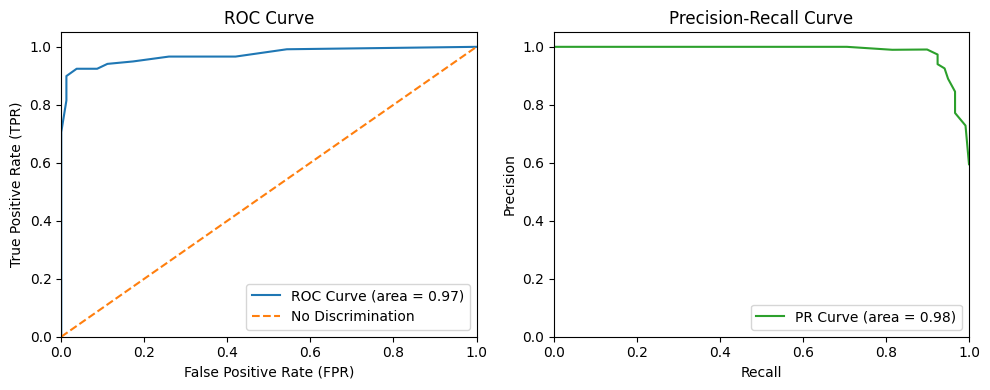

In [35]:
# Drawing the ROC and PR Curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming you have predicted probabilities (y_proba) from your model

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# PR Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Define a brighter color palette
bright_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot ROC Curve on first subplot with brighter color
ax1.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc, color=bright_colors[0])
ax1.plot([0, 1], [0, 1], 'k--', label='No Discrimination', color=bright_colors[1])
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")

# Plot PR Curve on second subplot with brighter color
ax2.plot(recall, precision, label='PR Curve (area = %0.2f)' % pr_auc, color=bright_colors[2])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower right")

# Adjust spacing between subplots (optional)
plt.tight_layout()

plt.show()


#### <span style="color: turquoise;">Result of Step 4</span>

**<span style="color: turquoise;">ROC-curve covering 97% of the area and PR-Curve covering 98% of the area under the graph proof that the model has quite reasonable quality</span>**

# <span style="color: turquoise;">Finding the Best Segments of AZWatch Customers</soan>
To find out how to segment the customers of AZWatch best different clustering algorythms have to be tested.

* Heirarchical Clustering
* Kmeans Clustering
* DBSCAN

### <span style="color: turquoise;">Preparing the Data</span>

**1) first we need to load the data into a DataFrame**

**2) next data needs to be cleaned from outliers**

**3) categorial data needs to be encoded**

In [37]:
# Display the first few rows of the Clustering DataFrame
# Load the CSV file into a DataFrame
file_path = "/Users/bernhardwagner/Documents/Final Project/data/AZWatch_subscribers.csv"
clustering_df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
clustering_df.head()

subscriber_id    age_group  engagement_time  engagement_frequency  \
0          14451        18-34             5.55                     7   
1          18386     under 18             5.12                    12   
2          12305  35 and over             4.25                     4   
3          17546        18-34             8.54                    15   
4          15399        18-34            12.12                    20   

  subscription_status  
0          subscribed  
1          subscribed  
2             churned  
3          subscribed  
4          subscribed

In [38]:
# Removing More Outliers
# Outliers from engagement_time is removed ut not from engagement_frequency so lets remove the outliers
# Calculate quartiles
Q1 = data['engagement_frequency'].quantile(0.25)
Q3 = data['engagement_frequency'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['engagement_frequency'] < lower_bound) | (data['engagement_frequency'] > upper_bound)]
data.drop(outliers.index, inplace=True)


# Calculate quartiles
Q1 = data['engagement_time'].quantile(0.25)
Q3 = data['engagement_time'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['engagement_time'] < lower_bound) | (data['engagement_time'] > upper_bound)]
data.drop(outliers.index, inplace=True)


In [39]:
# Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
clustering_encoder = LabelEncoder()
# Drop the subscriber_id column
clustering_df.drop(columns=["subscriber_id"], inplace=True)
# Encode the categorical columns
clustering_df['age_group_cat'] = clustering_encoder.fit_transform(clustering_df['age_group'])  # Encoding age_group
clustering_df['subscription_status_cat'] = clustering_encoder.fit_transform(clustering_df['subscription_status'])  # Encoding Subscription Status
# Exclude the original columns
numerical_df=clustering_df.select_dtypes(exclude="O")


In [40]:
clustering_df.head()

age_group  engagement_time  engagement_frequency subscription_status  \
0        18-34             5.55                     7          subscribed   
1     under 18             5.12                    12          subscribed   
2  35 and over             4.25                     4             churned   
3        18-34             8.54                    15          subscribed   
4        18-34            12.12                    20          subscribed   

   age_group_cat  subscription_status_cat  
0              0                        1  
1              2                        1  
2              1                        0  
3              0                        1  
4              0                        1

In [41]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
norm_scaler=MinMaxScaler()
scaled_df=pd.DataFrame(norm_scaler.fit_transform(numerical_df),columns=numerical_df.columns)
# Print the first few rows of the scaled DataFrame
scaled_df.head()

engagement_time  engagement_frequency  age_group_cat  \
0         0.318019              0.155556            0.0   
1         0.292363              0.266667            1.0   
2         0.240453              0.088889            0.5   
3         0.496420              0.333333            0.0   
4         0.710024              0.444444            0.0   

   subscription_status_cat  
0                      1.0  
1                      1.0  
2                      0.0  
3                      1.0  
4                      1.0

Extra Input on the Dendrogram
## 2.1.Hierarchical Clustering

## Dendrogram

"""
A dendrogram is a tree-like diagram that illustrates the hierarchical clustering of a dataset. It visually represents the relationships between data points based on their similarities or dissimilarities.

The clustering process starts by considering each data point as its own individual cluster. Then, it iteratively merges the two most similar clusters based on a chosen distance metric. This merging process continues until all data points are grouped into a single cluster.

The dendrogram displays these merging steps as branches, with the distance between two branches indicating their similarity. Shorter distances represent higher similarity between the clusters that merged at that point.

Here are some key components of a dendrogram:

* **Leaves:** Represent individual data points in the dataset.
* **Branches:** Represent merging events between clusters.
* **Height of a branch:** Indicates the distance between the two clusters that merged at that point.
* **Cutting line (optional):** A horizontal line that helps determine the number of clusters based on a desired threshold distance.

Dendrograms are helpful for:

* Visualizing the hierarchical structure of data.
* Identifying the natural number of clusters in a dataset.
* Understanding the relationships between different clusters.

When interpreting a dendrogram, it's important to consider the chosen distance metric and the overall scale of the diagram. You can also use domain knowledge to guide the selection of an appropriate cutting line for determining the final number of clusters.
"""

### <span style="color: turquoise;">Hierarchical Clustering</span>

* Creating a visual depiction
* Finding the fitting number of Clusters
* Judging on quality of the clustered segments

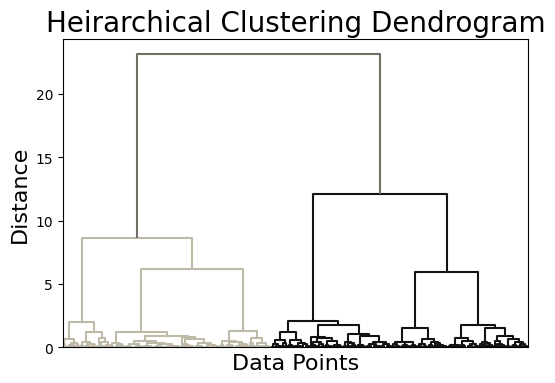

In [42]:
# Visualising Hierarchical Clustering
# Importing Libraries
from scipy.cluster import hierarchy

# Plot the dendrogram
plt.figure(figsize=(6,4))
plt.title("Heirarchical Clustering Dendrogram",fontsize=20)
plt.ylabel("Distance",fontsize=16)
plt.xlabel("Data Points",fontsize=16)
dendogram=hierarchy.dendrogram(hierarchy.linkage(scaled_df,method="ward"),no_labels=True)
plt.show()

In [43]:
# Output for Hierarchical Clustering 
# Importing the AgglomerativeClustering class from sklearn.cluster
from sklearn.cluster import AgglomerativeClustering  

# Initializing the AgglomerativeClustering model with 4 clusters and using the "ward" linkage method
hc_model = AgglomerativeClustering(n_clusters=4, linkage="ward")

# Fitting the model to the scaled data (scaled_df) and predicting the cluster labels
clusters = hc_model.fit_predict(scaled_df)

# Creating a copy of the scaled data to add the cluster labels
testing_df = scaled_df.copy()

# Adding a new column to the dataframe with the predicted cluster labels
testing_df['Heirarchical_Cluster'] = clusters

# Grouping the data by the cluster labels and calculating the mean for each cluster
result = testing_df.groupby("Heirarchical_Cluster").mean()

# Displaying the result
result


from sklearn.metrics import silhouette_score
hc_score=silhouette_score(testing_df.drop(columns=["Heirarchical_Cluster"]),testing_df['Heirarchical_Cluster'])
print(f"The Silhouette Score is {hc_score} indicating good cluster separation")
print(f"Optimal Number of Clusters for Heirarchical clustering is  {len(set(hc_model.labels_))}")


The Silhouette Score is 0.6053444706889982 indicating good cluster separation
Optimal Number of Clusters for Heirarchical clustering is  4


#### <span style="color: turquoise;">Outcome Hierarchical Clustering</span>

**Insight from Dendrogram** : data is distributed naturally, the number of clusters as fours seems to be fine

**Help for Interpretation** : Age groups are: Under 18 = 0 ; 35+ = 1; 18-34 = 2, Subscriptions status: Churned = 0; Subsrcibed = 1

**Quality of the Method** : With a silhouette score of 0.6053 it seems to be a rather good model

<span style="color: turquoise;">**The optimal number for clusters seems to be 4**</span>

### <span style="color: turquoise;">KMeans Clustering</span>

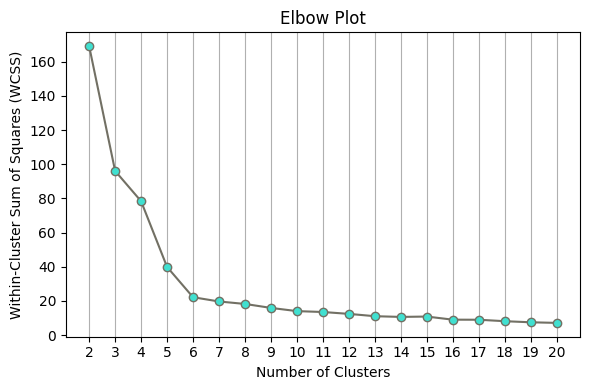

In [44]:
#Elbow plot and Silhoutte Score  Plot for finding the optimal value for K

# Importing the KMeans class from sklearn.cluster
from sklearn.cluster import KMeans
# dictionary to store the number of clusters, WCSS, and Silhouette Scores
k_means_dict = dict(cluster_no=[], wcs=[], sil_score=[])
# Ignoring warning messages
warnings.filterwarnings('ignore')

# Loop to calculate WCSS and Silhouette Score for a range of cluster numbers
for i in range(2, 21):
    model = KMeans(n_clusters=i)
    model.fit(scaled_df)
    sse = model.inertia_
    score = silhouette_score(scaled_df, model.labels_)
    k_means_dict['cluster_no'].append(i)
    k_means_dict['wcs'].append(sse)
    k_means_dict['sil_score'].append(score)


# Plot the elbow plot on the first subplot (ax1)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(k_means_dict['cluster_no'], k_means_dict['wcs'], marker='o', markerfacecolor='turquoise')
ax1.set_title("Elbow Plot")
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel("Within-Cluster Sum of Squares (WCSS)")
ax1.set_xticks(k_means_dict['cluster_no'])
ax1.grid(axis='x')

# Adjust layout for better aesthetics using tight_layout()
plt.tight_layout()

plt.show()

In [45]:
# Output for KMeans Clustering
kmeans_model=KMeans(n_clusters=6,random_state=46)
kmeans_model.fit(scaled_df)
clusters=kmeans_model.predict(scaled_df)
testing_df['Kmeans_Clusters']=clusters
from sklearn.metrics import silhouette_score
kmeans_score=silhouette_score(testing_df.drop(columns=["Heirarchical_Cluster","Kmeans_Clusters"]),testing_df['Kmeans_Clusters'])
print(f"The Silhotte Score is {kmeans_score} indicating good cluster separation")
print(f"Optimal Number of Clusters for KMeans Cluserting is  {len(set(kmeans_model.labels_))}")

The Silhotte Score is 0.6825097386605595 indicating good cluster separation
Optimal Number of Clusters for KMeans Cluserting is  6


#### <span style="color: turquoise;">Outcome KMeans Clustering</span>

<span style="color: turquoise;">**Quality of the Method** </span>
- With a silhouette score of 0.6825 it seems to be a rather good model

<span style="color: turquoise;">**The optimal number for clusters seems to be 6**</span>

### <span style="color: turquoise;">DBScan</scan>

A density-based clustering algorithm that groups data based on density. It can handle noise and clusters of arbitrary shapes.

Key Parameters:

Epsilon (eps): Maximum distance between neighbors (defines cluster radius).
MinPts: Minimum number of neighbors a point needs to be a core point (dense region).
Finding Epsilon:

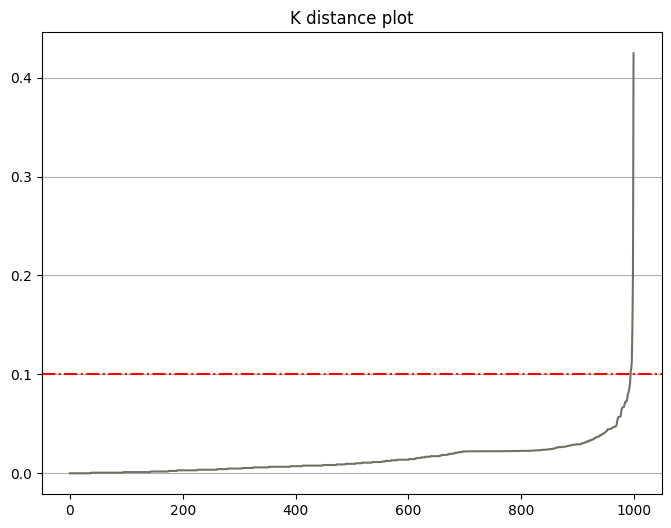

In [46]:
# Defining the Key Parameter EPS
# We have to find the optimal clusters values for DBScan for that we need to find the value for epsilon parameter
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=7)
nn.fit(scaled_df)
dist,ind=nn.kneighbors(scaled_df)
import numpy as np
dist=np.sort(dist,axis=0)
new_dist=dist[:,1]

plt.figure(figsize=(8,6))
plt.title("K distance plot")
plt.plot(new_dist)
plt.grid(axis="y")
plt.axhline(y=0.1,color="r",ls="-.")
plt.show()

In [47]:
# Output for DBScan Clustering
# Importing the DBSCAN class from sklearn.cluster
from sklearn.cluster import DBSCAN

# Initializing the DBSCAN model with epsilon=0.1 and min_samples=5
dbscan_model=DBSCAN(eps=0.1,min_samples=5)
# Fitting the model to the scaled data (scaled_df) and predicting the cluster labels
dbscan_model.fit(scaled_df)
clusters=dbscan_model.labels_

# Importing the silhouette_score function from sklearn.metrics
from sklearn.metrics import silhouette_score
# Calculating the Silhouette Score for the DBSCAN model
DBSCAN_score=silhouette_score(scaled_df,dbscan_model.labels_)
# Displaying the Silhouette Score
print(f"The Silhotte Score is {DBSCAN_score} indicating good cluster separation")
# Displaying the optimal number of clusters
print(f"Optimal Number of Clusters for DBSCAN {len(set(dbscan_model.labels_))}")

The Silhotte Score is 0.6774413255994807 indicating good cluster separation
Optimal Number of Clusters for DBSCAN 7


#### <span style="color: turquoise;">Outcome DBScan Clustering</span>

<span style="color: turquoise;">**Quality of the Method** </span>
- With a silhouette score of 0.6774 it seems to be a rather good model

<span style="color: turquoise;">**The optimal number for clusters seems to be 7**</span>

### <span style="color: turquoise;">Choosing the Best Clustering Method</span>

All three algorithms achieved reasonable silhouette scores, indicating some level of successful cluster separation.
**KMEeans** achieved the highest score (0.6825) suggesting it might have captured the underlying cluster structure slightly better in this specific case. However, the difference between DBSCAN and KMeans Heirarchical Clustering is relatively small.

 <span style="color: turquoise;">**Select Kmeans as our model of choice in contrast to other clustering algorithms**</span>

In [48]:
# Creating a DataFrame with the cluster labels
testing_df.drop(columns=["Heirarchical_Cluster"]).groupby("Kmeans_Clusters").mean()

engagement_time  engagement_frequency  age_group_cat  \
Kmeans_Clusters                                                         
0                       0.520603              0.303902            0.0   
1                       0.188876              0.112518            0.5   
2                       0.329401              0.313320            0.5   
3                       0.365250              0.316481            1.0   
4                       0.412181              0.117584            0.0   
5                       0.297538              0.110073            1.0   

                 subscription_status_cat  
Kmeans_Clusters                           
0                                    1.0  
1                                    0.0  
2                                    1.0  
3                                    1.0  
4                                    0.0  
5                                    0.0

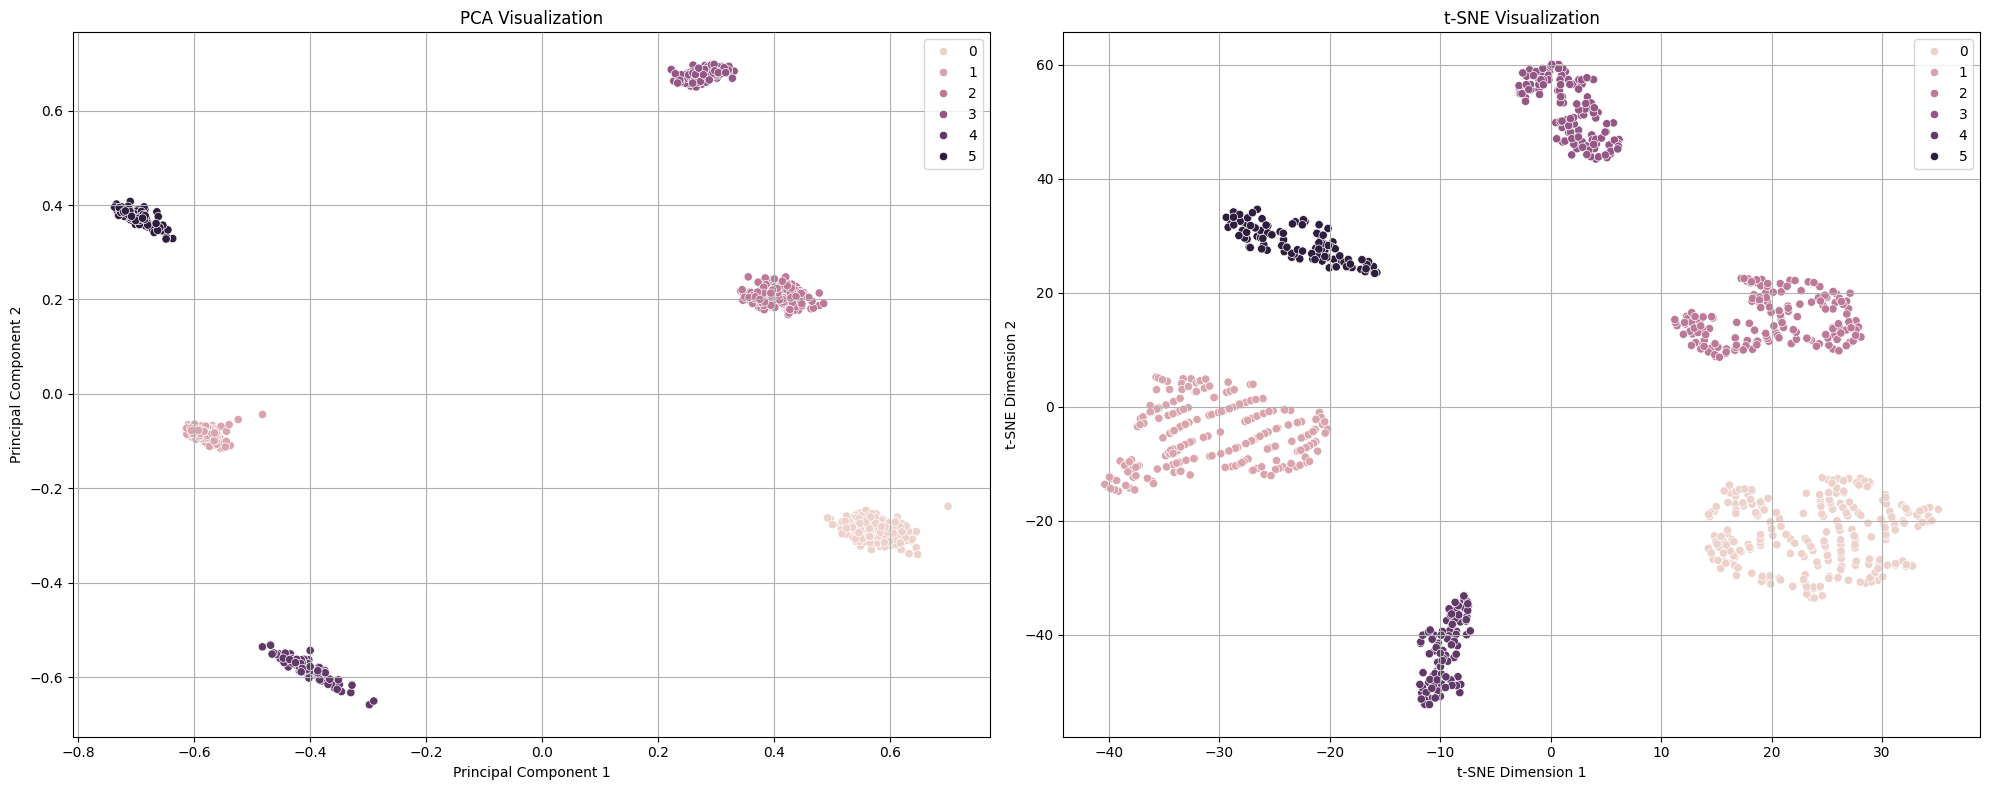

Number of samples in each cluster:
Cluster 0: 262 samples
Cluster 1: 237 samples
Cluster 2: 171 samples
Cluster 3: 120 samples
Cluster 4: 103 samples
Cluster 5: 107 samples


In [60]:
# Visualizing the Clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns  # Import seaborn

# PCA Visualization
pca = PCA(n_components=2)  # Choose 2 components for 2D visualization
pca_transformed = pca.fit_transform(scaled_df)

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, learning_rate=50, random_state=42)  # Choose 2 components and adjust perplexity as needed
tsne_transformed = tsne.fit_transform(scaled_df)

# Create a figure with one row and two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Adjust figure size as desired

# PCA Visualization
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=kmeans_model.labels_, ax=ax1)
ax1.set_title("PCA Visualization")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.grid(True)

# t-SNE Visualization
sns.scatterplot(x=tsne_transformed[:, 0], y=tsne_transformed[:, 1], hue=kmeans_model.labels_, ax=ax2)
ax2.set_title("t-SNE Visualization")
ax2.set_xlabel("t-SNE Dimension 1")
ax2.set_ylabel("t-SNE Dimension 2")
ax2.grid(True)

# Adjust layout (optional)
plt.tight_layout()

plt.show()
# Count the number of samples in each cluster
labels = kmeans_model.labels_
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of samples in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples")